In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Q1

In [3]:
train = pd.read_csv("../data/occupancy_train.csv")
test = pd.read_csv("../data/occupancy_test.csv")

In [4]:
display(train.shape)
display(train.head())
display(test.head())

(8143, 7)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


None

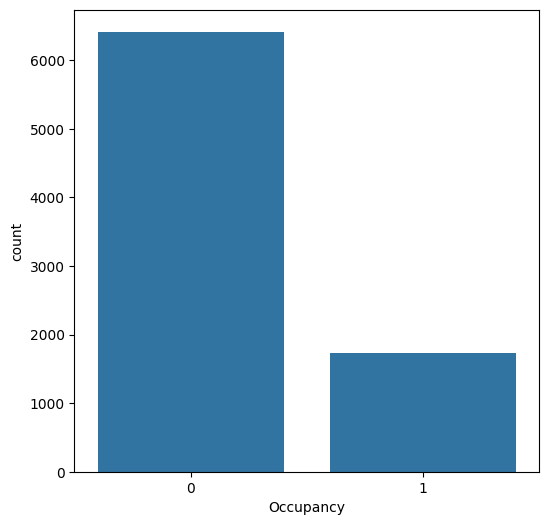

In [6]:
target_count = train['Occupancy'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(target_count)
plt.show()

In [7]:
num_cols = train.select_dtypes(exclude="object").columns

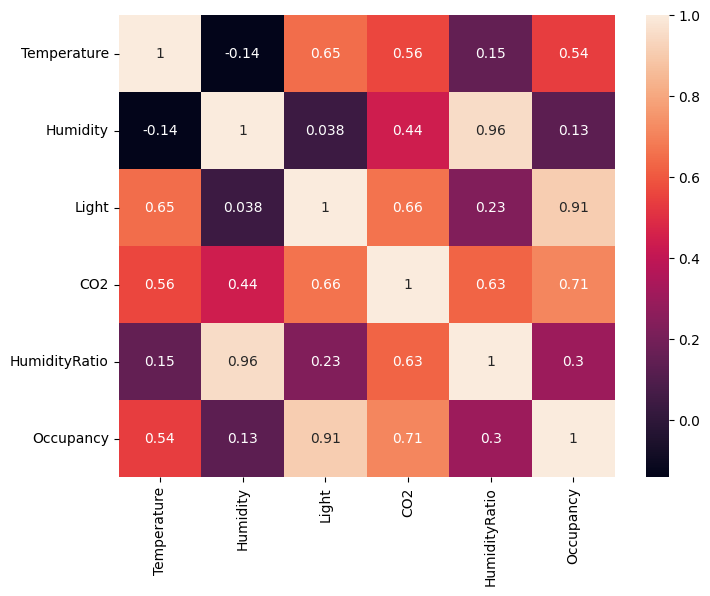

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(train[num_cols].corr(), annot=True)
plt.show()

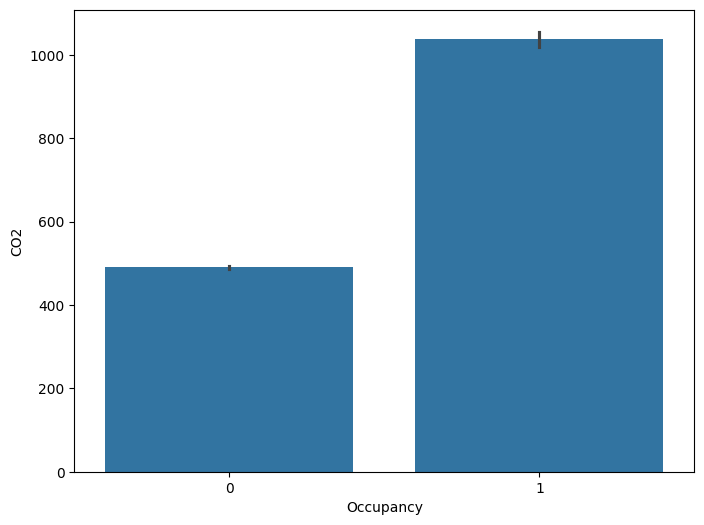

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(train, x="Occupancy", y="CO2", estimator="mean")
plt.show()

In [10]:
X_train = train.drop(labels=["Occupancy", "date"], axis=1)
y_train = train['Occupancy']

X_test = test.drop(labels=["Occupancy", "date"], axis=1)
y_test = test['Occupancy']

In [11]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train_ros, y_train_ros)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9478424015009381


In [14]:
accs =[]

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ros, y_train_ros)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    accs.append(score)
    print(score)

print(f"Highest Accuracy Score is {max(accs)} at K: {accs.index(max(accs)) + 1}")

0.9365853658536586
0.9365853658536586
0.95046904315197
0.9362101313320825
0.9478424015009381
0.9482176360225141
0.974108818011257
0.973358348968105
0.9737335834896811
0.9737335834896811
Highest Accuracy Score is 0.974108818011257 at K: 7


# Q2

In [15]:
df = pd.read_csv("../data/Iris.csv")

In [16]:
display(df.shape)
display(df.head())

(150, 6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
X = df.drop(labels=["Species", "Id"], axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
def chi_sqr_distance(x, y):
    total = 0.0
    for xi, yi in zip(x, y):
        denom = xi + yi
        if denom == 0:
            continue
        total += ((xi - yi) ** 2) / denom
    return total

class KNN:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train.to_numpy()
        self.y_train = y_train.to_numpy()
    
    def predict(self, X_test):
        labels = [self._predict_single(x) for x in X_test.to_numpy()]
        return np.array(labels)
    
    def _predict_single(self, x):
        distances = [chi_sqr_distance(x, x_train) for x_train in self.X_train]
        k_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:self.k]
        k_neighbour_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_neighbour_labels).most_common(1)
        return most_common[0][0]

In [21]:
knn = KNN()
knn.fit(X_train, y_train)

In [22]:
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Q3

In [23]:
df = pd.read_csv("../data/cancer_patient_data_sets.csv")

In [24]:
display(df.shape)
display(df.head())

(1000, 26)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [25]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

None

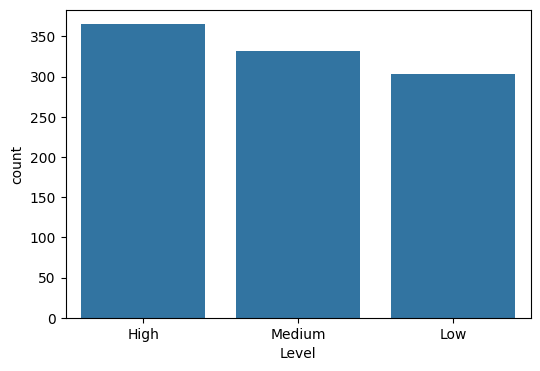

In [26]:
level_counts = df['Level'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(level_counts)
plt.show()

In [27]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [index, Patient Id, Age, Gender, Air Pollution, Alcohol use, Dust Allergy, OccuPational Hazards, Genetic Risk, chronic Lung Disease, Balanced Diet, Obesity, Smoking, Passive Smoker, Chest Pain, Coughing of Blood, Fatigue, Weight Loss, Shortness of Breath, Wheezing, Swallowing Difficulty, Clubbing of Finger Nails, Frequent Cold, Dry Cough, Snoring, Level]
Index: []

[0 rows x 26 columns]


##### Ordinal Encoding because the Label column has a clear order Low, Medium, High

In [28]:
ord_enc = OrdinalEncoder()
df['Level'] = ord_enc.fit_transform(df[['Level']])

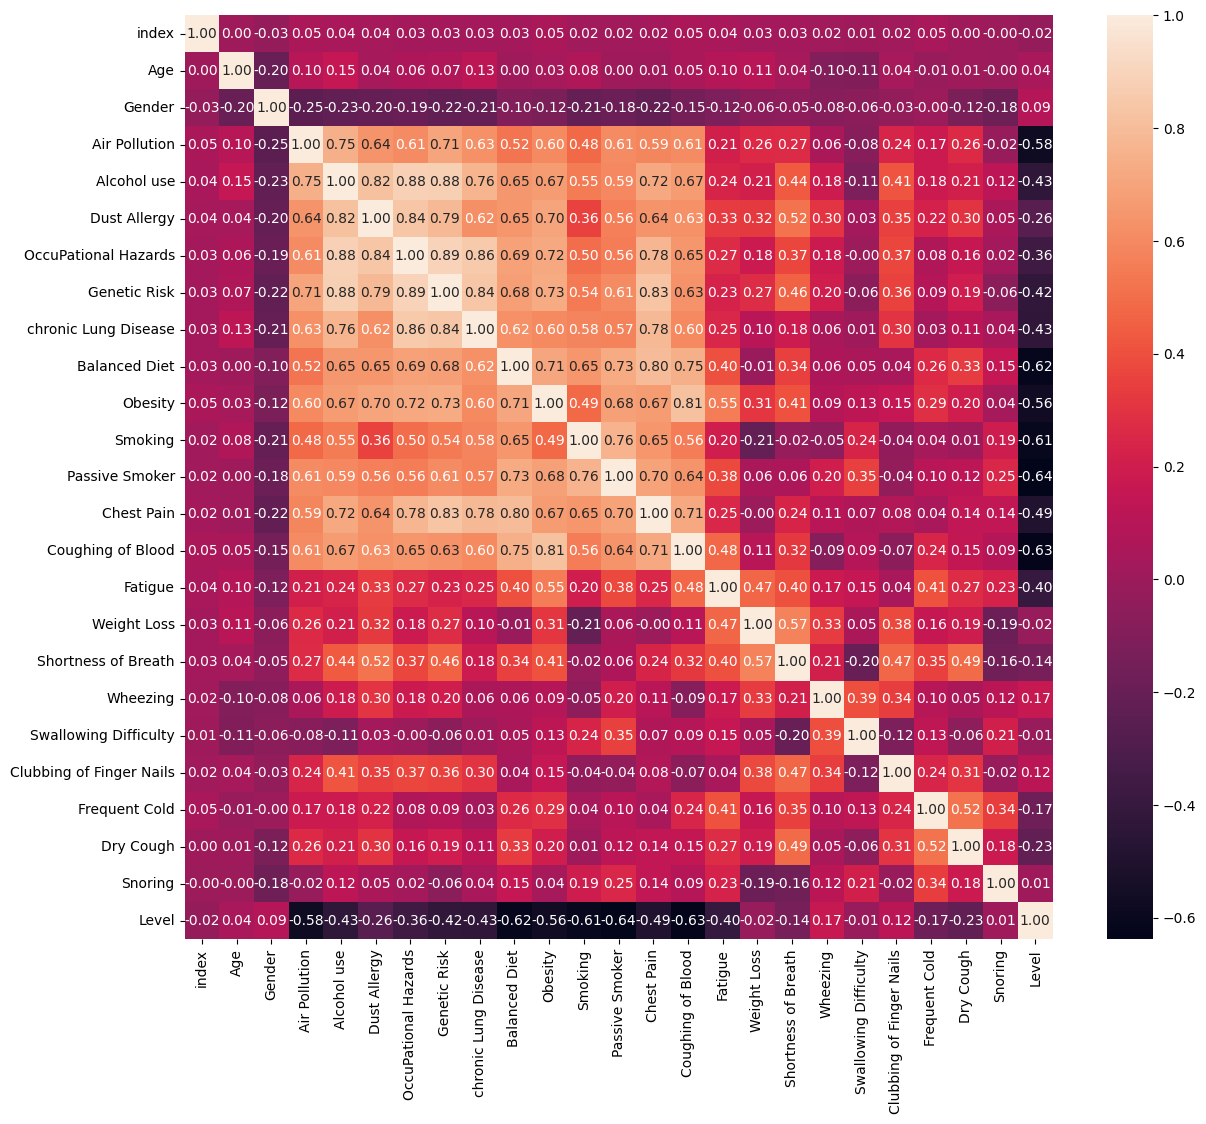

In [29]:
numeric_df = df.select_dtypes(exclude="object")
corr_matrix = numeric_df.corr(method="pearson")

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [30]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.96700
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.83463
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.00000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.00000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.00000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.00000


In [31]:
X = df.drop(labels=["index", "Patient Id", "Level"], axis=1)
y = df['Level']

corr_matrix = X.corr(method="pearson")
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.85
to_drop = [col for col in upper_tri.columns if any(abs(upper_tri[col]) > threshold)]

X = X.drop(columns=to_drop)

In [32]:
to_scale = [col for col in X.columns if col != 'Gender']
scaler = StandardScaler()
X[to_scale] = scaler.fit_transform(X[to_scale])

##### The validation set is used to fine tune the hyperparamter without touching the test set to avoid overfitting. This allows us to find best k value

In [33]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=0)

In [36]:
metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]
results = []

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, knn.predict(X_train))
    val_acc = accuracy_score(y_val, knn.predict(X_val))
    test_acc = accuracy_score(y_test, knn.predict(X_test))

    results.append({"Metric": metric,
                    "Train Accuracy": train_acc,
                    "Validation Accuracy": val_acc,
                    "Test Accuracy": test_acc})

results_df = pd.DataFrame(results)
results_df

,Metric,Train Accuracy,Validation Accuracy,Test Accuracy
0,euclidean,1.000000,1.000,1.00
1,manhattan,1.000000,1.000,1.00
2,chebyshev,0.996429,0.975,0.99
3,minkowski,1.000000,1.000,1.00


##### All the metrics provide the same accuracy, only the chebyshev shows a small decrement. This however can suggest that the model might be overfitting if the training accuracy is that perfect. Maybe by applying cross validation a more accurate result will be seen